# Лекция 1

## Создание и визуализация просты графов

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## 1. 

1\.1\. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)

1\.2\. Визуализировать граф, построенный с помощью фукнции из задания 1. 

Документация:
* https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
* https://networkx.github.io/documentation/stable/reference/drawing.html


# 1.1

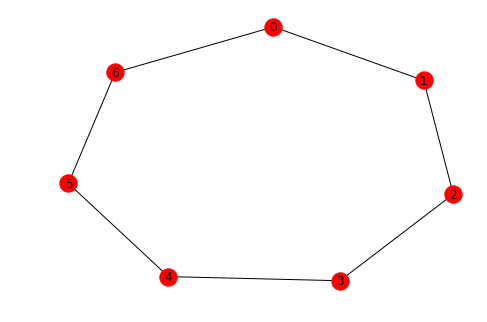

In [9]:
def get_graph(n,d):
    G = nx.cycle_graph(n)
    if d == True:
        nx.draw(G, with_labels= True)
    return(G)
H = get_graph(7,True)

In [432]:
print(H.nodes())

[0, 1, 2, 3, 4, 5, 6]


## 2. 

2\.1\. Построить квадратную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.

2\.2\. Реализовать собственную функцию создания квадратной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

2\.3\. Реализовать собственную функцию создания квадратной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

2\.4\. Модифицировать функцию 2\.2\. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

2\.5-2\.8 Аналогичные задачи для треугольных решеток.

2\.9-2\.12\* Аналогичные задачи для гексогональных решеток.

# Квадратные решетки

# 2.1

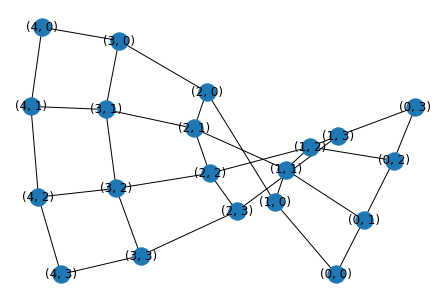

In [376]:
H = nx.grid_2d_graph(5,4)
nx.draw(H, with_labels = True)

# 2.2

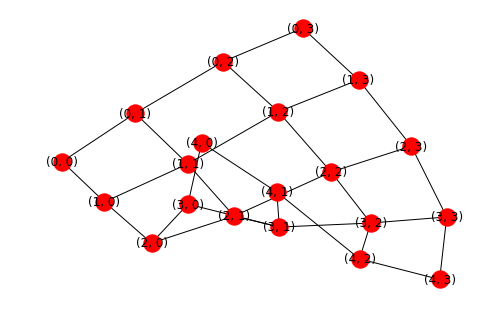

In [7]:
def create_square_lattice_graph(n,m,d): #d - параметр рисования (True - да, False - нет)
    G = nx.Graph()
    for i in range(n-1):
        for j in range(m-1):
            G.add_edge((i,j),(i,j+1))
            G.add_edge((i,j),(i+1,j))
    for i in range(n-1):
        G.add_edge((i,m-1),(i+1,m-1))
    for j in range(m-1):
        G.add_edge((n-1,j),(n-1,j+1))
    if d == True:
        nx.draw(G, with_labels = True)
    return G
X = create_square_lattice_graph(5,4,True)

# 2.3

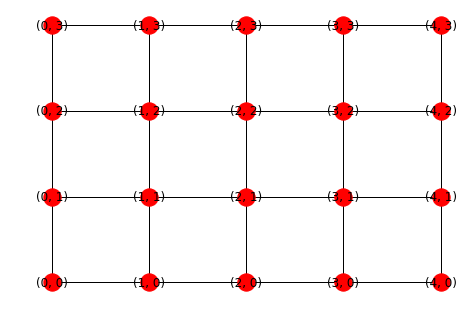

In [3]:
def create_square_beairuful_graph(n,m):
    G = create_square_lattice_graph(n,m,False)
    for i in G.nodes:
        G.node[i]['pos'] = i
    position = nx.get_node_attributes(G,'pos')
    nx.draw(G, pos = position, with_labels = True)
create_square_beairuful_graph(5,4)

# 2.4

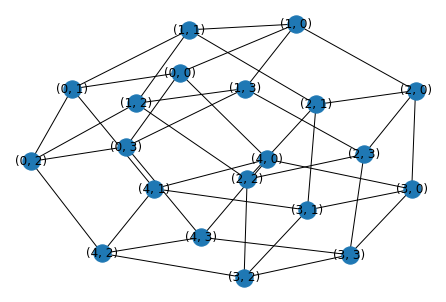

In [166]:
def create_square_lattice_cyclic_graph(n,m,c): #c - параметр цикличности ('N', 'M', 'NandM')
    G = create_square_lattice_graph(n,m,False)
    if c == 'N':
        for i in range(n):
            G.add_edge((i,0),(i,m-1))
    if c == 'M':
        for j in range(m):
            G.add_edge((0,j),(n-1,j))
    if c == 'NandM' or c == 'MandN':
        for i in range(n):
            G.add_edge((i,0),(i,m-1))
        for j in range(m):
            G.add_edge((0,j),(n-1,j))
    nx.draw(G, with_labels = True)
create_square_lattice_cyclic_graph(5,4,'NandM')

# Треугольные решетки

# 2.5

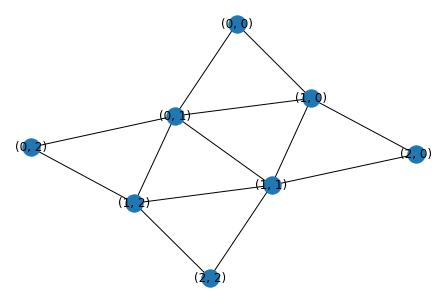

In [361]:
I = nx.triangular_lattice_graph(2,3,with_positions = True)
pos = nx.get_node_attributes(I,'pos')
nx.draw(I, with_labels = True)

# 2.6

56


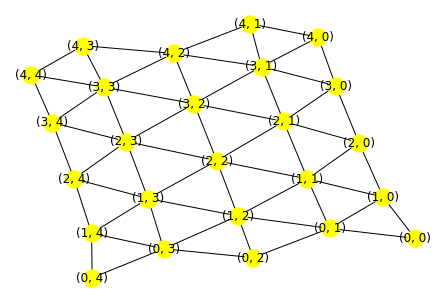

In [355]:
def create_triangle_lattice_graph(m,n,plotting):
    M = m + 1
    N = (n+1)//2
    G = create_square_lattice_graph(N+1,M,False)
    for i in range(N):
        for j in range(1,m,2):
                G.add_edge((i,j),(i+1,j+1))
    for i in range(N):
        for j in range(0,m,2):
                G.add_edge((i+1,j),(i,j+1))
    if(n%2):
        for i in range(1,m+1,2):
            G.remove_node((N,i))
    if(plotting == True):
        nx.draw(G, with_labels=True, node_color = 'yellow')
        print(len(G.edges))
    return G
create_triangle_lattice_graph(4,8,True)

# 2.7

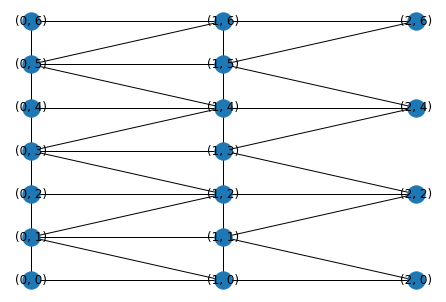

In [161]:
def create_triangle_lattice_cyclic_graph(n,m,c): #c - параметр цикличности ('N', 'M', 'NandM')
    G = create_triangle_lattice_graph(m,n,False)
    for i in G.nodes:
        G.node[i]['pos'] = i
    pos = nx.get_node_attributes(G,'pos')
    nx.draw(G, pos, with_labels = True)
create_triangle_lattice_cyclic_graph(3,6,'N')

# 2.8

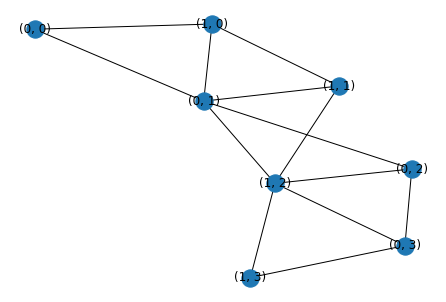

In [286]:
def create_triangle_lattice_cyclic_graph(n,m,c): #c - параметр цикличности ('N', 'M', 'NandM')
    G = create_triangle_lattice_graph(m,n,False)
    if c == 'N':
        if n%2 == 1: #чередуется  (n нечетное)
            for i in range(0,n,2):
                G.add_edge((0,i),(n,i))
                G.add_edge((0,i+1),((n+1)//2-1,i+1))
        if n%2 == 0: #не чередуется  (n четное)
            for i in range(n):
                G.add_edge((0,i),((n+1)//2,i))




            #G.add_edge((0,j),(n-1,j))
    nx.draw(G, with_labels = True)
create_triangle_lattice_cyclic_graph(2,3,'N')

In [ ]:
def create_triangle_lattice_cyclic_graph(n,m,c): #c - параметр цикличности ('N', 'M', 'NandM')
    G = create_triangle_lattice_graph(m,n,False)
    if (n%2 == 1) and (m%2 == 1):
        print ('е')   
    else:
        if c == 'N':
            if n%2 == 1: #чередуется  (n нечетное)
                for i in range(0,n):
                    G.add_edge((0,i),(i,m))
            if n%2 == 0: #не чередуется  (n четное)
                for i in range(n):
                    G.add_edge((0,i),((n+1)//2,i))





            #G.add_edge((0,j),(n-1,j))
    nx.draw(G, with_labels = True)
create_triangle_lattice_cyclic_graph(8,4,'N')

[((0, 0), (0, 1)), ((0, 0), (1, 0)), ((0, 1), (0, 2)), ((0, 1), (1, 1)), ((0, 1), (1, 2)), ((0, 1), (1, 0)), ((1, 0), (1, 1)), ((1, 0), (2, 0)), ((0, 2), (0, 3)), ((0, 2), (1, 2)), ((1, 1), (1, 2)), ((1, 1), (2, 1)), ((1, 1), (2, 2)), ((1, 1), (2, 0)), ((0, 3), (1, 3)), ((0, 3), (1, 2)), ((1, 2), (1, 3)), ((1, 2), (2, 2)), ((2, 0), (2, 1)), ((2, 1), (2, 2)), ((1, 3), (2, 3)), ((1, 3), (2, 2)), ((2, 2), (2, 3))]


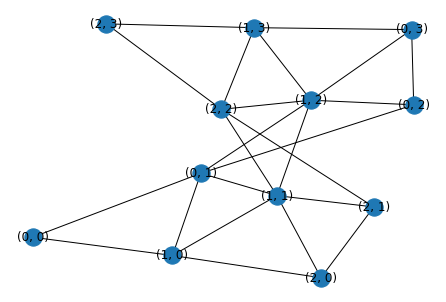

In [352]:
def create_triangle_lattice_cyclic_graph(n,m,c): #c - параметр цикличности ('N', 'M', 'NandM')
    G = create_triangle_lattice_graph(m,n,False)
    N = n//2
    M = m//2
    if c == 'N':
        #if (n%2 == 1) and (m%2 == 0): #чередуется  (n нечетное, m - четное)
         #   for i in range(0,n,2):
          #      G.add_edge((0,i),(n,i))
           #     G.add_edge((0,i+1),((n+1)//2-1,i+1))
        if n%2 == 0: #не чередуется  (n четное, m - любое)
            for i in range(N+1):
                G.add_edge((0,i),(N,i))
    if c == "M":
        if n%2 == 0: #не чередуется  (n четное)
            for i in range(m+1):
                G.add_edge((i,0),(i,N))   
        if n%2 == 1: #чередуется  (n нечетное)
            print('.')
    print(G.edges)            
    nx.draw(G, with_labels = True)
create_triangle_lattice_cyclic_graph(4,3,'M')

In [ ]:
def create_triangle_lattice_cyclic_graph(n,m,c): #c - параметр цикличности ('N', 'M', 'NandM')
    G = create_triangle_lattice_graph(m,n,False)
    if c == 'N':
        for i in range(n):
            if n%2 == 1: #чередуется
                G.add_edge((0,i),(,i))
            if n%2 == 0: #не чередуется
                G.add_edge((0,i),(n/2,i))


    if c == 'M':
        for j in range(m):
            G.add_edge((0,j),(n-1,j))
    if c == 'NandM' or c == 'MandN':
        for i in range(n):
            G.add_edge((i,0),(i,m-1))
        for j in range(m):
            G.add_edge((0,j),(n-1,j))
    nx.draw(G, with_labels = True)
create_square_lattice_cyclic_graph(5,4,'NandM')

# 2.9

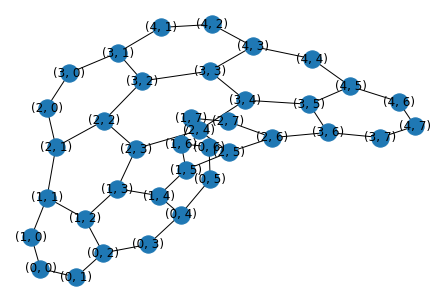

In [13]:
I = nx.hexagonal_lattice_graph(3,4)
nx.draw(I, with_labels = True)

# 2.10

In [ ]:
def create_hexagonal_lattice_graph(n,m,d): #d - параметр рисования (True - да, False - нет)
    G = nx.Graph()
    for i in range(n-1):
        for j in range(m-1):
            G.add_edge((i,j),(i,j+1))
            G.add_edge((i,j),(i+1,j))
    for i in range(n-1):
        G.add_edge((i,m-1),(i+1,m-1))
    for j in range(m-1):
        G.add_edge((n-1,j),(n-1,j+1))
    if d == True:
        nx.draw(G, with_labels = True)
    return(G)
X = create_hexagonal_lattice_graph(5,4,True)

## 3. 

3\.
Граф «u,v цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длинной u и v соответственно (см.рис). 

__1,2 цветок:__
![1,2 цветок](1_2_fl.png "1,2 цветок")

__2,2 цветок:__
![2,2 цветок](2_2_fl.png "2,2 цветок")


3\.1\. Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения. 

Для построенного граафа 1.2 цветка получить:

3\.2\. Количество узлов, количество связей, среднюю степень узла.

3\.3\. Визуализацию графа (с указанием идентификаторов узлов).

3\.4\. Степень каждого узла и сохранить информацию о ней в самом узле.

3\.5\. Визуализацию графа, в котрой размер узла определяется его степенью (с указанием идентификаторов узлов).

# 3.1,  3.2,  3.3

Количество узлов = 15
Количество связей = 27
Средняя степень узла = 3.6


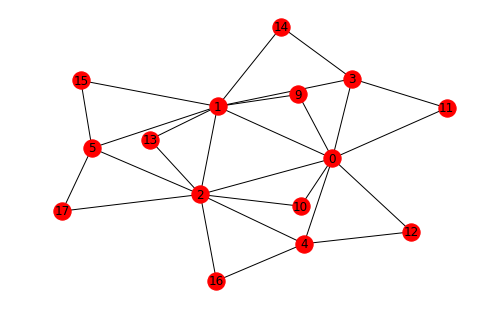

In [10]:
def create_flower3(n,d):
    sum = 0
    G = get_graph(3,False)
    e = list(G.edges())
    for j in range(1,n):
        k = len(G.edges())
        for i in range(k):
            G.add_edge(k+i,e[i][0])
            G.add_edge(k+i,e[i][1])
        e = list(G.edges())
    for i in range(len(G.nodes())):
        sum += list(G.degree())[i][1]
    st = sum/len(G.nodes())
    print('Количество узлов =', len(list(G.nodes())))
    print('Количество связей =', len(list(G.edges())))
    print('Средняя степень узла =', st)
    if d == True:
        nx.draw(G, with_labels = True)
G = create_flower3(3,True)


# 4. 

Датасеты с сетями:

http://networkrepository.com

http://konect.uni-koblenz.de

https://snap.stanford.edu/data/

---

https://networkdata.ics.uci.edu/resources.php

https://kateto.net/2016/05/network-datasets/


Документация:
* https://networkx.github.io/documentation/stable/reference/readwrite/index.html



# 4.

Для построенного граафа 1.2 цветка получить:

4\.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.

4\.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреизации.

4\.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4\.6 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

4\.7 Среднее значение коэффицента кластеризации для всего графа. (? разные)

# 5.

Для построенного граафа 1.2 цветка получить:

4\.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество\_узлов\_с\_данной\_степенью), картежи в списке отсортированы по возрастанию степени.

4\.2 График распределения степеней узлов.4

4\.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

## 6.

Для построенного граафа 1.2 цветка получить:

5\.1\. Два произвольных узла и кратчайший путь между ними.

5\.2\. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

5\.3\. Средний кратчайший путь для всего графа.

5\.4\. Диаметр графа.

## 7.

7\. Релизовать функцию построения u,v цветка. Функция принимает на вход 3 параметра: u – длина 1го пути при замене связи; v – длина 2го пути при замене связи; n - количество шагов построения. 

In [ ]:
ф